# Ensemble Learning

In [11]:
# To check how the error of an ensemble is always better than a base class
# this can be plotted using a Binomial Error function - Probablity Mass Function in Python

from scipy.misc import comb
import math
def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier/2.0))
    probs = [comb(n_classifier, k) *
            (error**k) *
            ((1-error)**(n_classifier - k)) 
            for k in range(k_start, n_classifier+1)]    
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)


0.034327507019042969

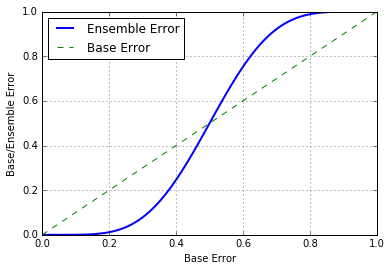

In [19]:
import numpy as np
error_rate = np.arange(0.0, 1.01, 0.01)
error_ensemble = [ensemble_error(n_classifier=11, error=error) for error in error_rate]
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(error_rate, error_ensemble, label='Ensemble Error', linewidth=2)
plt.plot(error_rate, error_rate, label='Base Error', linewidth=1, linestyle='--')
plt.xlabel('Base Error')
plt.ylabel('Base/Ensemble Error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [28]:
# Use weighted Majority vote based on class probabilities
print np.argmax(np.bincount([0,0,1], weights=[0.2,0.2,0.6]))
ex = np.array([[0.9,0.1], [0.8, 0.2], [0.4, 0.6]])
p = np.average(ex, axis=0, weights=[0.2,0.2,0.6])
print p
print np.argmax(p)

1
[ 0.58  0.42]
0


## Implementing a Majority Vote Classifier

In [33]:
#Implementing a majority Voting Classifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityBaseClassifier(BaseEstimator, ClassifierMixin):
    """ A majority vote ensemble classifier
    Parameters
    -----------
    classifiers: array_like, shape =[n_classifiers]
    Different classifiers for the ensemble
    
    vote: str, {'classlabel', 'probability'}
    Default: 'classlabel'
    
    
    """

In [34]:
?operator